In [50]:
# Add Matplotlib inline magic command to align charts with cells
%matplotlib inline

# Import dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
# Files to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [52]:
# Read the city data file and store in pandas dataframe
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [53]:
# Read the ride data file and store in pandas dataframe
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410935873
1,South Michelleport,3/4/19 18:24,30.24,2343912425577
2,Port Samanthamouth,2/24/19 4:29,33.44,2005065760003
3,Rodneyfort,2/10/19 23:22,23.44,5149245426178
4,South Jack,3/6/19 4:28,34.58,3908451377344
5,South Latoya,3/11/19 12:26,9.52,1994999424437
6,New Paulville,2/27/19 11:17,43.25,793208410091
7,Simpsonburgh,4/26/19 0:43,35.98,111953927754
8,South Karenland,1/8/19 3:28,35.09,7995623208694
9,North Jasmine,3/9/19 6:26,42.81,5327642267789


### Inspect City Data DataFrame

In [54]:
# Get the city data columns and find all rows that contain null values
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [55]:
# To confirm city data does not have null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [56]:
# Get the data types of each column in city data
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [57]:
# Check how many data points there are for each type of city using unique method
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [58]:
# Get the number of data points from the urban cities
sum(city_data_df['type'] == 'Rural')

18

### Inspect Ride Data DataFrame

In [59]:
# Get the ride data columns and find all rows that contain null values
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [60]:
# Confirm there are no null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [61]:
# Check all data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

### All data looks okay - time to merge

In [62]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])

# Display the dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/19 4:28,34.58,3908451377344,46,Urban


## Create bubble chart 
### - Avg Fare Vs. Total Number of Rides - Size based on Avg # drivers in Urban, Suburban, Rural

In [63]:
# Start by creating dataframe for each type of city
urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']

In [64]:
# Get the number of rides from each city using groupby() and count()
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [65]:
# Calculate average fare for each city using groupby() and mean()
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [66]:
# Calculate average number of drivers for each city in urban, suburban and rural using groupby() and mean()
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

### Make bubble chart using MATLAB method

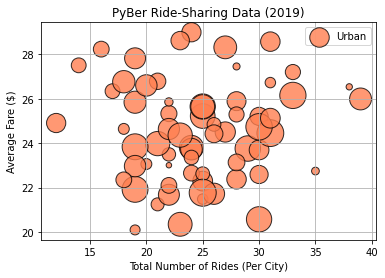

In [67]:
# Build scatter plot for urban cities
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_driver_count, c='coral',
           edgecolor='black', linewidths=1,
           alpha=0.8, label='Urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

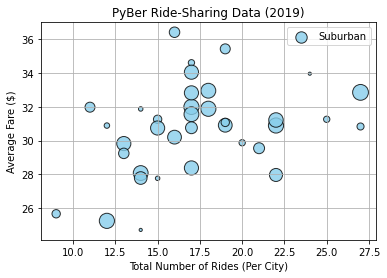

In [68]:
# Build scatter plot for suburban cities
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_driver_count, c='skyblue',
           edgecolor='black', linewidths=1,
           alpha=0.8, label='Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

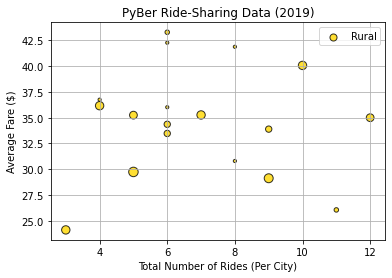

In [69]:
# Build scatter plot for rural cities
plt.scatter(rural_ride_count, rural_avg_fare, 
            s=10*rural_driver_count, c='gold',
           edgecolor='black', linewidths=1,
           alpha=0.8, label='Rural')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

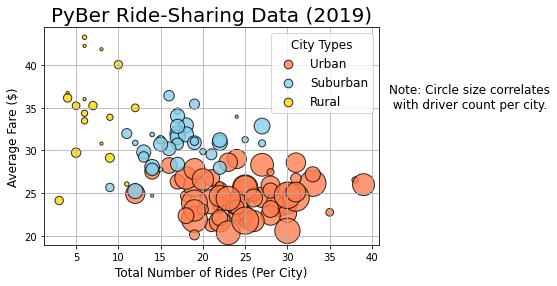

In [70]:
# Merge charts for all city types together

plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_driver_count, c='coral',
           edgecolor='black', linewidths=1,
           alpha=0.8, label='Urban')

plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_driver_count, c='skyblue',
           edgecolor='black', linewidths=1,
           alpha=0.8, label='Suburban')

plt.scatter(rural_ride_count, rural_avg_fare, 
            s=10*rural_driver_count, c='gold',
           edgecolor='black', linewidths=1,
           alpha=0.8, label='Rural')

# Format chart
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# add legend. make marker sizes the same for all city types
lgnd = plt.legend(fontsize='12', mode='Expanded',
                 scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# add text label about circle size
plt.text(42, 35, "Note: Circle size correlates\n with driver count per city.", fontsize='12')

# save the figure
plt.savefig("Analysis/Fig1.png", bbox_inches="tight")

# show plot
plt.show()

### Statistical Analysis

In [71]:
# Get summary stats for urban, suburban and rural df
urban_cities_df.describe()
suburban_cities_df.describe()
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [72]:
# Get summary stats for urban, suburban and rural df ride count
urban_ride_count.describe(), suburban_ride_count.describe(), rural_ride_count.describe()

(count    66.000000
 mean     24.621212
 std       5.408726
 min      12.000000
 25%      21.000000
 50%      24.000000
 75%      28.000000
 max      39.000000
 Name: ride_id, dtype: float64,
 count    36.000000
 mean     17.361111
 std       4.323707
 min       9.000000
 25%      14.000000
 50%      17.000000
 75%      19.250000
 max      27.000000
 Name: ride_id, dtype: float64,
 count    18.000000
 mean      6.944444
 std       2.508157
 min       3.000000
 25%       5.250000
 50%       6.000000
 75%       8.750000
 max      12.000000
 Name: ride_id, dtype: float64)

In [73]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [74]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [75]:
# Calculate the mode of the ride count for the urban cities
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [76]:
# Import NumPy and the stats model from SciPy
import numpy as np
import scipy.stats as sts

In [78]:
# Calculate the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count:.2f}.")

# Use scipy for mode. mode returns 22, the count is 7 (so 7 times it occurs)
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [79]:
# Calculate the measures of central tendency for the ride count for the suburban cities
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count:.2f}.")

# Use scipy for mode. 
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.00.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [80]:
# Calculate the measures of central tendency for the ride count for the rural cities
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count:.2f}.")

# Use scipy for mode. 
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.00.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


### Summary Stats for Fare by City Type

In [84]:
# Get the fares for the cities
urban_fares = urban_cities_df['fare']
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']

In [85]:
# Calculate the measures of central tendency for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

# Use scipy for mode. 
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [86]:
# Calculate the measures of central tendency for the average fare for the suburban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

# Use scipy for mode. 
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [87]:
# Calculate the measures of central tendency for the average fare for the rural cities
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

# Use scipy for mode. 
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


### Summary Statistics for Revenue by City Type

In [94]:
# Get the driver count data from the urban cities
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [101]:
# Calculate the measures of central tendency for the average number of drivers for urban city
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers for urban city is {mean_urban_drivers:.0f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The mean number of drivers for urban city is {median_urban_drivers:.0f}.")

# Use scipy for mode. 
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers for urban city is {mode_urban_drivers}.")

The mean number of drivers for urban city is 37.
The mean number of drivers for urban city is 37.
The mode number of drivers for urban city is ModeResult(mode=array([39]), count=array([86])).


In [102]:
# Calculate the measures of central tendency for the average number of drivers for suburban city
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers for suburban city is {mean_suburban_drivers:.0f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The mean number of drivers for suburban city is {median_suburban_drivers:.0f}.")

# Use scipy for mode. 
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers for suburban city is {mode_suburban_drivers}.")

The mean number of drivers for suburban city is 14.
The mean number of drivers for suburban city is 16.
The mode number of drivers for suburban city is ModeResult(mode=array([20]), count=array([79])).


In [103]:
# Calculate the measures of central tendency for the average number of drivers for rural
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers for rural city is {mean_rural_drivers:.0f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The mean number of drivers for rural city is {median_rural_drivers:.0f}.")

# Use scipy for mode. 
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers for rural city is {mode_rural_drivers}.")

The mean number of drivers for rural city is 4.
The mean number of drivers for rural city is 4.
The mode number of drivers for rural city is ModeResult(mode=array([1]), count=array([32])).


### Create Box and Whisker Plot for Ride Count Data

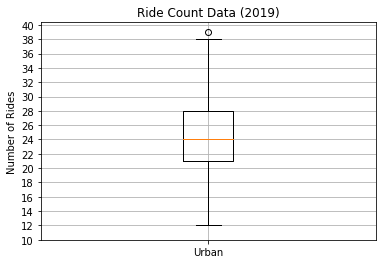

In [104]:
# Create box and whisker plot for urban cities ride count data
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()

plt.show()

In [105]:
# The above box plot represents the below summary statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

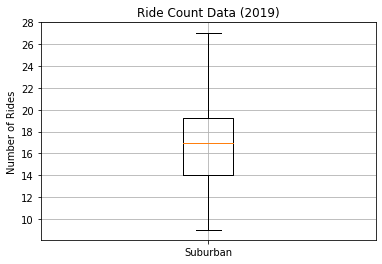

In [107]:
# Create box and whisker plot for suburban cities ride count data
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 30, step=2.0))
ax.grid()

plt.show()

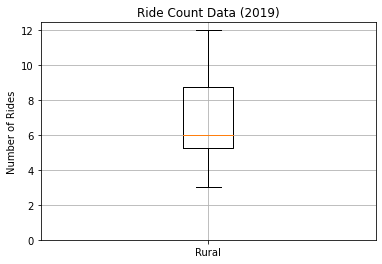

In [109]:
# Create box and whisker plot for rural cities ride count data
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# Add title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 14, step=2.0))
ax.grid()

plt.show()

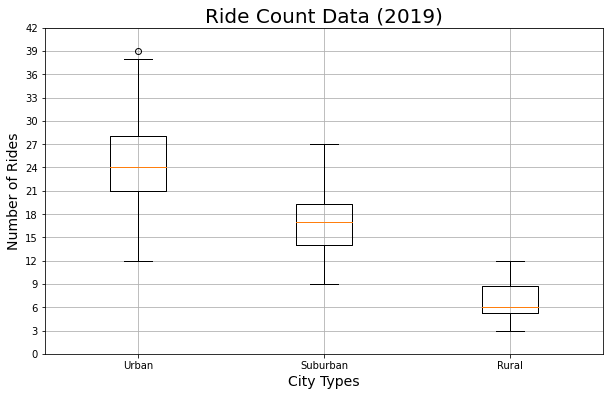

In [112]:
# Add all ride count box and whisker plots to the same graph
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()

plt.savefig("Analysis/Fig2.png")

plt.show()

Findings: There is one outlier (39) in the urban ride count data.
The average number of rides in the rural cities is about 4 and 3.5 times lower per city than the urban and suburban cities respectively.

In [114]:
# Find out which city has the highest rider count
urban_ride_count.head(10)

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
East Kaylahaven    29
Erikaland          12
Grahamburgh        25
Huntermouth        24
Hurleymouth        28
Name: ride_id, dtype: int64

In [115]:
# Get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


### Create Box and Whisker Plots for Ride Fare Data

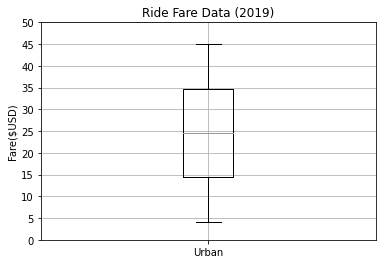

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [120]:
# create a box and whisker plot for urban fare data
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add title and y-axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()

plt.show()

print("Summary Statistics")
urban_fares.describe()

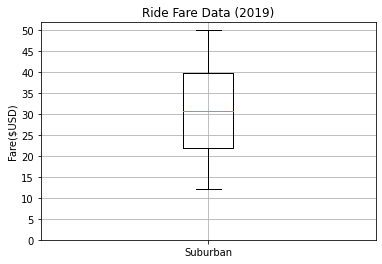

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [124]:
# create a box and whisker plot for suburban fare data
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

# Add title and y-axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,55, step=5.0))
ax.grid()

plt.show()

print("Summary Statistics")
suburban_fares.describe()

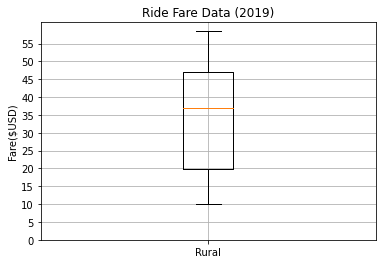

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [123]:
# create a box and whisker plot for rural fare data
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# Add title and y-axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,60, step=5.0))
ax.grid()

plt.show()

print("Summary Statistics")
rural_fares.describe()

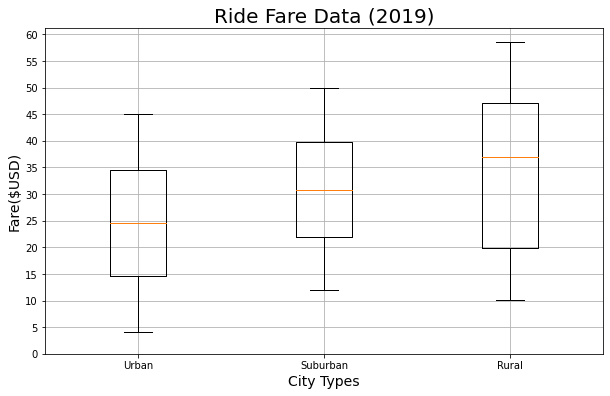

In [127]:
# create a box and whisker plot for rural fare data
x_labels = ['Urban', 'Suburban', 'Rural']
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_fare_data, labels=x_labels)

# Add title and y-axis label and grid
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0,65, step=5.0))
ax.grid()

plt.savefig("Analysis/Fig3.png")

plt.show()


Findings: From the above chart, we see there are no outliers. 
The average fare for riders in rural cities is about $11 and $5 more per ride than urban and suburban. This is because there are less riders in rural, which causes a higher fare for demand. 

### Create Box and Whisker Plots for Driver Count Data

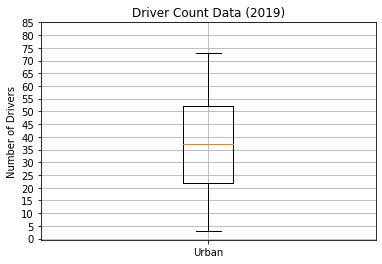

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [129]:
# Create box and whisker plot for the urban driver count data
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

# Add title, y-axis label and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()

plt.show()

print('Summary Statistics')
urban_drivers.describe()

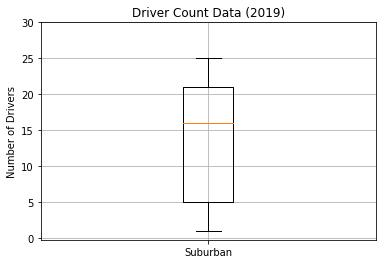

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [131]:
# Create box and whisker plot for the suburban driver count data
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

# Add title, y-axis label and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 35, step=5.0))
ax.grid()

plt.show()

print('Summary Statistics')
suburban_drivers.describe()

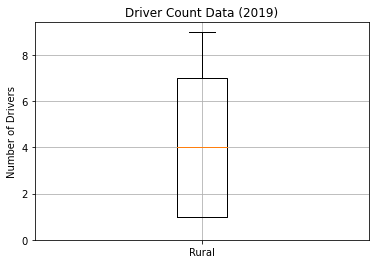

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [134]:
# Create box and whisker plot for the rural driver count data
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

# Add title, y-axis label and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 10, step=2.0))
ax.grid()

plt.show()

print('Summary Statistics')
rural_drivers.describe()

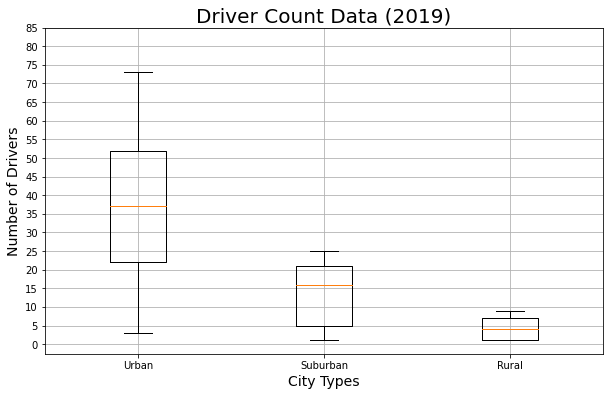

In [136]:
# Create box and whisker plot for the urban driver count data
x_labels = ['Urban', 'Suburban', 'Rural']
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(driver_count_data, labels=x_labels)

# Add title, y-axis label and grid
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()

plt.savefig("Analysis/Fig3.png")

plt.show()

Findings: The average number of drivers in rural cities is 9 times less than urban and 4 times less than suburban cities. Sense of overall revenue? 